<center>
    
# Python User Group
# Tutorial

</center>
<img src="python.jpg" width="100"/> <img src="logo.png" width="150"/>

## Presenter: Amandine Schaeffer

# Topic: get and analyse BoM weather / wind data


 # Introduction

<font size="4">

<img src="Screenshot_2020-05-08 Climate Data Online.png" />
<br/>
<br/>

### BOM weather stations:

http://www.bom.gov.au/climate/cdo/about/sites.shtml


###  Data requested March 2020:
* Element: Wind speed, wind direction, wind gust, Mean sea level pressure, Precipitation since 9am, Air Temperature,Relative humidity

* Reporting frequency: half hourly (metars: METeorological Aviation Reports, automatic), 3 hours


* Station numbers:
040209, 040043, 068151,068228,040925,040913, 58009, 58012, 58212, 58216, 58198, 59007, 59030, 59040, 59151, 60139, 61366, 66022, 66037, 60141, 66200, 66199, 66198, 66203, 66201, 66202, 66212, 66194, 66195, 66059, 69138, 59024, 60013, 61411, 61416, 61055, 61391, 61299, 61406, 61074, 61074, 60013, 60146, 59047, 59039, 58080, 58212, 66043, 66051, 66062, 66196, 66197 ,69137 ,69017, 69147, 69022, 009193, 009256, 092124, 094198, 094155 

* For more info on indivual stations: http://www.bom.gov.au/climate/data/stations/ 

* For more info on the data: http://www.bom.gov.au/climate/data/stations/about-weather-station-data.shtml

<font size="2">
    
### Comments / known issues...

<font size="4">
    

* BOM data are in local time (including issues with daylight savings)

* Kurnel 066043 wind has issues (lower) before 1990s

* N: not quality controlled

* NO WIND: st,066062,66  ,SYDNEY (OBSERVATORY HILL)               ,01/1858,       ,-33.8607, 151.2050,GPS            ,NSW,  39.0,  40.2,94768,1993,2020, 98,  0,100,  0,  0,  0,#









### WIND

"Wind speed and direction are typically an average over the 10 minutes prior to the observation time. Measurements are made using an automatic anemometer, usually at a height of approximately 10 metres above the surface. 

Wind gusts reported are the highest 3 second mean wind speed (sampled every second) over the last 10 minutes.

Wind direction can be output as either degrees (true) or points of the compass (8 or 16). If degrees are output, then values are rounded to the nearest 10 degrees and directions ending in 5 are rounded up (e.g. 105 degrees rounds to 110 degrees). When the wind speed is zero the wind direction is also zero (i.e. calm conditions).

The Bureau's current uncertainty tolerances for automatic wind speed measurements are +/- 5% of the wind speed for wind speeds greater than or equal to 10 m/s and  +/- 0.3 m/s for wind speeds below 10 m/s."



# Outline of tutorial:

<font size="4">
<br>

* Choose station
<br>
* Load data into panda dataframe
<br>
* Deal with time
<br>
* Deal with meteorologic versus oceanographic convention
<br>
* Compute wind stress and upwelling index
<br>
* Daily averages
<br>
* Save to NetCDF and csv

# Packages:

<br>
<br>

In [1]:
# for loading data and calculations
import pandas as pd
import numpy as np
# for plotting timeseries and histogram
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# To create time variables
import datetime
from datetime import date, timedelta
import xarray as xar

#pip install windrose
# conda install windrose
from windrose import plot_windrose


/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function w

# Choose BOM station

All stations are listed in the file: HM01X_StnDet_999999999777948.txt

st,066037,66  ,SYDNEY AIRPORT AMO                      ,01/1929,       ,-33.9465, 151.1731,SURVEY         ,NSW,   6.0,   5.0,94767,1948,2020, 62,  0,100,  0,  0,  0,#
Michael H

st,066043,66  ,KURNELL AWS                             ,03/2000,       ,-34.0039, 151.2111,GPS            ,NSW,   4.0,      ,95756,2000,2020, 98,  0,100,  0,  0,  0,#
Taimoor

st,066200,66  ,SYDNEY HARBOUR (CLARKE ISLAND)          ,08/1997,03/2001,-33.8642, 151.2394,GPS            ,NSW,   2.0,      ,     ,1997,2001, 96,  0,100,  0,  0,  0,#
Michael D

st,066198,66  ,SYDNEY HARBOUR (SHARK ISLAND)           ,08/1997,03/2001,-33.8614, 151.2569,GPS            ,NSW,   3.0,      ,     ,1997,2001, 95,  0,100,  0,  0,  0,#
Neil

st,066203,66  ,SYDNEY HARBOUR (BOMBORA)                ,09/1997,11/2000,-33.8167, 151.2722,               ,NSW,   2.0,      ,     ,1998,2000, 54,  0,100,  0,  0,  0,#
Edu

st,066202,66  ,SYDNEY HARBOUR (CANNAE POINT)           ,08/1997,03/2001,-33.8153, 151.2842,               ,NSW,  20.0,      ,     ,1997,2001, 77,  0,100,  0,  0,  0,#
Adil

st,066212,66  ,SYDNEY OLYMPIC PARK AWS (ARCHERY CENTRE),08/2011,       ,-33.8338, 151.0718,GPS            ,NSW,   4.0,      ,95765,2011,2020, 99,  0,100,  0,  0,  0,#
Steefan

st,066196,66  ,SYDNEY HARBOUR (WEDDING CAKE WEST)      ,02/1996,       ,-33.8405, 151.2643,GPS            ,NSW,   6.0,      ,95766,1996,2020, 82,  0,100,  0,  0,  0,#
Amandine

In [2]:
# PICK dataset: 
# More in: /home/z3340777/sci-maths-ocean/Data/WIND_BOM/WIND_BOM_202004/
folder = './DATA/'
plot_folder = './PLOTS/'
#file_name = 'HM01X_Data_066043_999999999777948' # KURNELL
file_name = 'HM01X_Data_066196_999999999777948' # SYDNEY HARBOUR (WEDDING CAKE WEST)      
STATION = file_name[12:17]
print(STATION)

66196


In [3]:
### READ INFO station
df_BOM_stations0 = pd.read_csv(folder + 'HM01X_StnDet_999999999777948.txt',header = None, dtype=object)#,usecols=[1,2,3,4,5,6,12,14,16,18,20,22,24,26])  # CAREFULL
#df_BOM = df_BOM_stations0.apply(pd.to_numeric, args=('coerce',)) # inserts NaNs where empty cell!!! 
df_BOM_stations0

# FIND STATION
bbb = df_BOM_stations0[1].str.find(STATION)
idx_station = bbb==1

print(df_BOM_stations0[:][idx_station])

STATION_isSYDNEY = df_BOM_stations0[3][idx_station].str.find("SYDNEY")
print(np.array(STATION_isSYDNEY)==0) # 0 if includes SYDNEY, -1 otherwise... ??



    0       1     2                                         3        4   \
50  st  066196  66    SYDNEY HARBOUR (WEDDING CAKE WEST)        02/1996   

         5         6          7                8    9   ...     12    13  \
50           -33.8405   151.2643  GPS              NSW  ...  95766  1996   

      14   15   16   17   18   19   20 21  
50  2020   82    0  100    0    0    0  #  

[1 rows x 22 columns]
[ True]


### For upwelling index: 
Need the angle of the coast. Look at https://www.sunearthtools.com/tools/distance.php for instance.


In [4]:
# For upwelling index, just a few
rho_w = 1024 # sea water density kg/m3

if (('Data_066043' in file_name) or (np.array(STATION_isSYDNEY)==0)): # Around Sydney
    lat = -33.9829
    coast_deg_angle = - 25      
elif 'Data_092124' in file_name: #'MAI
    lat = -42.6621
    coast_deg_angle = - 15
elif 'Data_040043' in file_name: #'NSI
    lat = -27.0314
    coast_deg_angle = - 350
else:
    lat = 'np.nan'
    
print('Do you have the coastline angle to compute the upwelling index?')
~np.isnan(lat)

Do you have the coastline angle to compute the upwelling index?


True

# Functions

In [5]:
# Function for wind vectors

def fun_GetU_meteo(speed,direction_inMETconv):
    wind_u = - speed * np.sin(np.pi / 180 * direction_inMETconv) # yes it's a - sin for the direction in met convention
    return wind_u
    
def fun_GetV_meteo(speed,direction_inMETconv):
    wind_v = - speed * np.cos(np.pi / 180 * direction_inMETconv)
    return wind_v

def fun_Dir_oceanoFROMmeteo_deg(Wind_dir_deg_meteo):
    Wind_dir_deg = (90 - Wind_dir_deg_meteo + 180);
    Wind_dir_deg[Wind_dir_deg <= 0] = Wind_dir_deg[Wind_dir_deg <= 0]+360;
    return Wind_dir_deg

def fun_Dir_meteoFROMoceano_deg(Wind_dir_deg_oceano):
    Wind_dir_deg = (90 - Wind_dir_deg_oceano + 180);
    Wind_dir_deg[Wind_dir_deg <= 0] = Wind_dir_deg[Wind_dir_deg <= 0]+360;
    return Wind_dir_deg

def fun_SYDtime2UTC(local_t):
    UTC_OFFSET = 10
    result_utc_time = local_t - UTC_OFFSET/24
    return result_utc_time

def fun_SYDdatetime2UTC(local_datetime):
    UTC_OFFSET = 10
    result_utc_datetime = [local_datetime[i] - datetime.timedelta(hours=UTC_OFFSET) for i in range(len(local_datetime)) ]
    return result_utc_datetime


def pol2cart(rho, phi):
    """
    author : Dr. Schaeffer
    """ 
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)
    
def cart2pol(x, y):
    """
    author : Dr. Schaeffer
    """   
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def rad2deg360(phi):
    """
    author : Dr. Schaeffer
    """ 
    x = np.degrees(phi)
    x[x < 0] = x[x < 0]+360;
    return(x)



In [6]:
# Function for upwell index
def f_coriolis(lat):  
    """Compute the Coriolis parameter for the given latitude:
    ``f = 2*omega*sin(lat)``, where omega is the angular velocity 
    of the Earth.
    
    Parameters
    ----------
    lat : array
      Latitude [degrees].
    """
    omega   = 7.2921159e-05  # angular velocity of the Earth [rad/s]
    return 2*omega*np.sin(lat/360.*2*np.pi)

In [7]:
# Functions to plot windrose

def fun_RosePlot(time_obs,direction_obs,speed_obs,title):
    ############# CARERFUL needs degrees between 0 and 360!!!!!!!!!!!!!!!!! use rad2deg360(phi)
    """
    returns a rose plot of the wind 
    """
    df = pd.DataFrame({"speed": speed_obs, "direction": direction_obs})
    bins = np.arange(0.01, 24, 4)
    fig=plt.figure()
    plot_windrose(df, kind="bar", normed=True, opening=0.8, nsector=8, edgecolor="white",bins=bins)
    plt.title('Wind blowing from, ' + title)


def fun_RosePlot_stress(time_obs,direction_obs,speed_obs,title):
    ############# CARERFUL needs degrees between 0 and 360!!!!!!!!!!!!!!!!! use rad2deg360(phi)
    """
    returns a rose plot of the wind stress
    """
    df = pd.DataFrame({"speed": speed_obs, "direction": direction_obs})
    bins = np.arange(0.01, 0.4, 0.05)
    fig=plt.figure()
    plot_windrose(df, kind="bar", normed=True, opening=0.8, nsector=8, edgecolor="white",bins=bins)
    plt.title('Wind stress blowing from, ' + title)


# Load data as a dataframe

In [8]:
### READ DATA BOM
df_BOM0 = pd.read_csv(folder + file_name + '.txt',usecols=[1,2,3,4,5,6,12,14,16,18,20,22,24,26])  # CAREFULL
df_BOM = df_BOM0.apply(pd.to_numeric, args=('coerce',)) # inserts NaNs where empty cell!!! 
print(list(df_BOM))
# Rename columns
df_BOM.columns = ['station_nb', 'year','month','day','hour','minute','Precip_since9AM_mm','Air_temp','Rel_hum_perc','Wind_speed_kmh','Wind_dir_deg_meteo','Wind_gust_speed_kmh','MSLP_hPa','station_P_hPa']

['Station Number', 'Year Month Day Hour Minutes in YYYY', 'MM', 'DD', 'HH24', 'MI format in Local time', 'Precipitation since 9am local time in mm', 'Air Temperature in degrees C', 'Relative humidity in percentage %', 'Wind speed in km/h', 'Wind direction in degrees true', 'Speed of maximum windgust in last 10 minutes in  km/h', 'Mean sea level pressure in hPa', 'Station level pressure in hPa']


In [9]:
df_BOM

,station_nb,year,month,day,hour,minute,Precip_since9AM_mm,Air_temp,Rel_hum_perc,Wind_speed_kmh,Wind_dir_deg_meteo,Wind_gust_speed_kmh,MSLP_hPa,station_P_hPa
0,66196,1996,2,28,19,30,NaN,NaN,NaN,16.6,350.0,20.5,NaN,NaN
1,66196,1996,2,28,20,0,NaN,NaN,NaN,16.6,350.0,22.3,NaN,NaN
2,66196,1996,2,28,20,30,NaN,NaN,NaN,14.8,350.0,20.5,NaN,NaN
3,66196,1996,2,28,21,0,NaN,NaN,NaN,13.0,340.0,29.5,NaN,NaN
4,66196,1996,2,28,21,30,NaN,NaN,NaN,11.2,230.0,25.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421991,66196,2020,3,25,7,0,NaN,18.9,NaN,11.2,360.0,13.0,NaN,NaN
421992,66196,2020,3,25,7,30,NaN,18.9,NaN,11.2,360.0,13.0,NaN,NaN
421993,66196,2020,3,25,8,0,NaN,19.2,NaN,11.2,360.0,13.0,NaN,NaN
421994,66196,2020,3,25,8,30,NaN,20.3,NaN,5.4,30.0,7.6,NaN,NaN


# Deal with time

In [10]:
# Create a datetime component and make it the index in UTC

times_dates_local = [datetime.datetime(df_BOM.year[i], df_BOM.month[i], df_BOM.day[i], df_BOM.hour[i], df_BOM.minute[i], 0, 0) for i in range(len(df_BOM)) ]
times_dates_UTC = fun_SYDdatetime2UTC(times_dates_local)
# Add in df
df_BOM.insert(1,"date_local", times_dates_local, True) 
df_BOM.insert(1,"date_UTC", times_dates_UTC, True) 
# Make date UTC index
df_BOM.index = pd.to_datetime(times_dates_UTC)

df_BOM = df_BOM.drop_duplicates(keep ='first') # Remove dup[licates when daylight saving - keep first

df_BOM


,station_nb,date_UTC,date_local,year,month,day,hour,minute,Precip_since9AM_mm,Air_temp,Rel_hum_perc,Wind_speed_kmh,Wind_dir_deg_meteo,Wind_gust_speed_kmh,MSLP_hPa,station_P_hPa
1996-02-28 09:30:00,66196,1996-02-28 09:30:00,1996-02-28 19:30:00,1996,2,28,19,30,NaN,NaN,NaN,16.6,350.0,20.5,NaN,NaN
1996-02-28 10:00:00,66196,1996-02-28 10:00:00,1996-02-28 20:00:00,1996,2,28,20,0,NaN,NaN,NaN,16.6,350.0,22.3,NaN,NaN
1996-02-28 10:30:00,66196,1996-02-28 10:30:00,1996-02-28 20:30:00,1996,2,28,20,30,NaN,NaN,NaN,14.8,350.0,20.5,NaN,NaN
1996-02-28 11:00:00,66196,1996-02-28 11:00:00,1996-02-28 21:00:00,1996,2,28,21,0,NaN,NaN,NaN,13.0,340.0,29.5,NaN,NaN
1996-02-28 11:30:00,66196,1996-02-28 11:30:00,1996-02-28 21:30:00,1996,2,28,21,30,NaN,NaN,NaN,11.2,230.0,25.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24 21:00:00,66196,2020-03-24 21:00:00,2020-03-25 07:00:00,2020,3,25,7,0,NaN,18.9,NaN,11.2,360.0,13.0,NaN,NaN
2020-03-24 21:30:00,66196,2020-03-24 21:30:00,2020-03-25 07:30:00,2020,3,25,7,30,NaN,18.9,NaN,11.2,360.0,13.0,NaN,NaN
2020-03-24 22:00:00,66196,2020-03-24 22:00:00,2020-03-25 08:00:00,2020,3,25,8,0,NaN,19.2,NaN,11.2,360.0,13.0,NaN,NaN
2020-03-24 22:30:00,66196,2020-03-24 22:30:00,2020-03-25 08:30:00,2020,3,25,8,30,NaN,20.3,NaN,5.4,30.0,7.6,NaN,NaN


# Deal with meteo to ocean convention...

/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]


<Figure size 432x288 with 0 Axes>

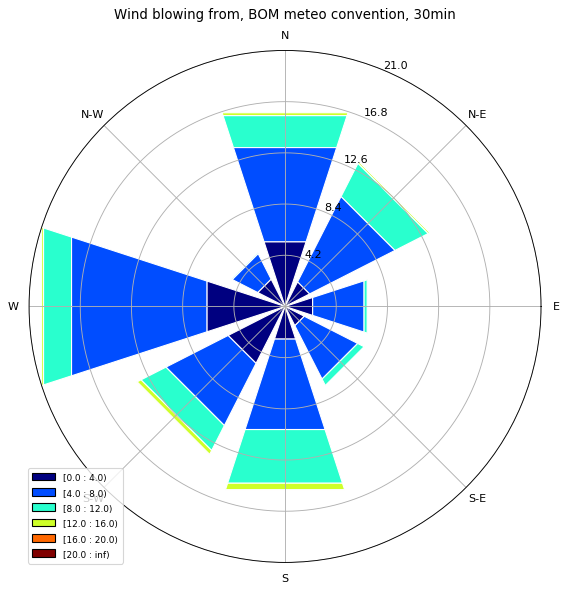

In [11]:
# Conversion speed direction from Meteo to Oceano
Wind_u = fun_GetU_meteo(df_BOM.Wind_speed_kmh.values/3.6,df_BOM.Wind_dir_deg_meteo.values) 
Wind_v = fun_GetV_meteo(df_BOM.Wind_speed_kmh.values/3.6,df_BOM.Wind_dir_deg_meteo.values)
Wind_dir_deg = fun_Dir_oceanoFROMmeteo_deg(df_BOM.Wind_dir_deg_meteo.values)
# [uwd,vwd]=pol2cart(Wind_speed_ms0, np.radians(Wind_dir_deg02)); #CHECK OK

# Wind rose Original data
fun_RosePlot(times_dates_UTC,df_BOM.Wind_dir_deg_meteo.values,df_BOM.Wind_speed_kmh.values/3.6,'BOM meteo convention, 30min')
plt.savefig(plot_folder + 'plot_windrose_raw_30min_' + file_name + '.png', bbox_inches='tight', pad_inches=0.5, dpi=150)


## Compute wind stress

/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less
/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal


<Figure size 432x288 with 0 Axes>

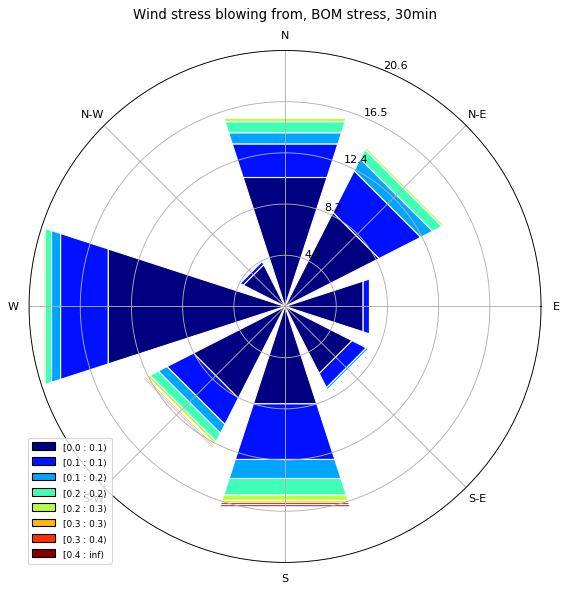

In [12]:
###  Wind stress
[speed, angle] = cart2pol(Wind_u,Wind_v);
rho_air=1.22;      # density of air NEW after 1.3
cd = (0.61 + 0.063*np.abs(speed))*1e-3;
cd[np.abs(speed) < 6] = 1.1e-3;
tau = cd * rho_air * np.abs(speed) * speed;
Wind_tau_u = tau*np.cos(angle); 
Wind_tau_v = tau*np.sin(angle);

# Wind rose wind stress from oceano
[rho,phi] = cart2pol(Wind_tau_u, Wind_tau_v)
fun_RosePlot_stress(times_dates_UTC,fun_Dir_meteoFROMoceano_deg(rad2deg360(phi)),rho,'BOM stress, 30min')
plt.savefig(plot_folder + 'plot_windrose_raw_30min_stress_' + file_name + '.png', bbox_inches='tight', pad_inches=0.5, dpi=150)

## Compute upwelling index

https://doi.org/10.1080/1755876X.2014.11020152

/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


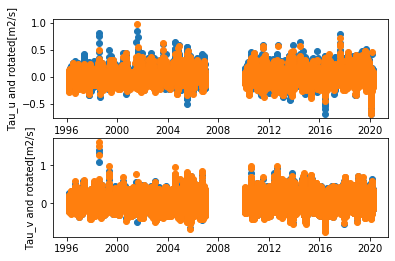

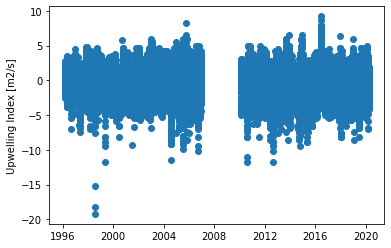

In [13]:
# Upwelling index

if ~np.isnan(lat):

    #Wind_u_rot = np.cos(coast_deg_angle * np.pi / 180) * Wind_u_ms + np.sin(coast_deg_angle * np.pi / 180) * Wind_v_ms;  #  across-shelf 
    #Wind_v_rot = - np.sin(coast_deg_angle * np.pi / 180) * Wind_u_ms + np.cos(coast_deg_angle * np.pi / 180) * Wind_v_ms;  #  along -shelf 
    Wind_tau_u_rot = np.cos(coast_deg_angle * np.pi / 180) * Wind_tau_u + np.sin(coast_deg_angle * np.pi / 180) * Wind_tau_v;  #  across-shelf 
    Wind_tau_v_rot = - np.sin(coast_deg_angle * np.pi / 180) * Wind_tau_u + np.cos(coast_deg_angle * np.pi / 180) * Wind_tau_v;  #  along -shelf 

    UI = Wind_tau_v_rot / (rho_w * f_coriolis(lat)) # UNITS m2 /s


    # CHECK
    plt.figure()
    plt.subplot(211)
    plt.plot_date(df_BOM.date_UTC,Wind_tau_u)
    plt.plot_date(df_BOM.date_UTC,Wind_tau_u_rot)
    plt.ylabel('Tau_u and rotated[m2/s]')
    plt.subplot(212)
    plt.plot_date(df_BOM.date_UTC,Wind_tau_v)
    plt.plot_date(df_BOM.date_UTC,Wind_tau_v_rot)
    plt.ylabel('Tau_v and rotated[m2/s]')
    plt.figure()
    plt.plot_date(df_BOM.date_UTC,UI)
    plt.ylabel('Upwelling Index [m2/s]')


# New dataframe with oceano

In [14]:
# Create new dataframe with only selected columns (e.g. don't want to take the mean of direction!!!)
df_BOM_oceano = df_BOM[['Precip_since9AM_mm','Air_temp','Rel_hum_perc','MSLP_hPa','Wind_speed_kmh','Wind_dir_deg_meteo','Wind_gust_speed_kmh']]
# Add in df
df_BOM_oceano.insert(1,"Wind_tau_u", Wind_tau_u)  # or df_BOM_all_daily['Wind_tau_v'] = Wind_tau_v ?
df_BOM_oceano.insert(1,"Wind_tau_v", Wind_tau_v) 
df_BOM_oceano.insert(1,"Wind_u_ms", Wind_u) 
df_BOM_oceano.insert(1,"Wind_v_ms", Wind_v) 
df_BOM_oceano.insert(1,"Wind_speed_ms", df_BOM.Wind_speed_kmh.values/3.6) 
if ~np.isnan(lat):
    df_BOM_oceano.insert(1,"Upwell_Index", UI) 

df_BOM_oceano = df_BOM_oceano.round(3)
df_BOM_oceano

,Precip_since9AM_mm,Upwell_Index,Wind_speed_ms,Wind_v_ms,Wind_u_ms,Wind_tau_v,Wind_tau_u,Air_temp,Rel_hum_perc,MSLP_hPa,Wind_speed_kmh,Wind_dir_deg_meteo,Wind_gust_speed_kmh
1996-02-28 09:30:00,NaN,0.280,4.611,-4.541,0.801,-0.028,0.005,NaN,NaN,NaN,16.6,350.0,20.5
1996-02-28 10:00:00,NaN,0.280,4.611,-4.541,0.801,-0.028,0.005,NaN,NaN,NaN,16.6,350.0,22.3
1996-02-28 10:30:00,NaN,0.223,4.111,-4.049,0.714,-0.022,0.004,NaN,NaN,NaN,14.8,350.0,20.5
1996-02-28 11:00:00,NaN,0.148,3.611,-3.393,1.235,-0.016,0.006,NaN,NaN,NaN,13.0,340.0,29.5
1996-02-28 11:30:00,NaN,-0.141,3.111,2.000,2.383,0.008,0.010,NaN,NaN,NaN,11.2,230.0,25.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24 21:00:00,NaN,0.141,3.111,-3.111,0.000,-0.013,0.000,18.9,NaN,NaN,11.2,360.0,13.0
2020-03-24 21:30:00,NaN,0.141,3.111,-3.111,0.000,-0.013,0.000,18.9,NaN,NaN,11.2,360.0,13.0
2020-03-24 22:00:00,NaN,0.141,3.111,-3.111,0.000,-0.013,0.000,19.2,NaN,NaN,11.2,360.0,13.0
2020-03-24 22:30:00,NaN,0.036,1.500,-1.299,-0.750,-0.003,-0.002,20.3,NaN,NaN,5.4,30.0,7.6


/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less
/home/z3340777/Logiciels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal


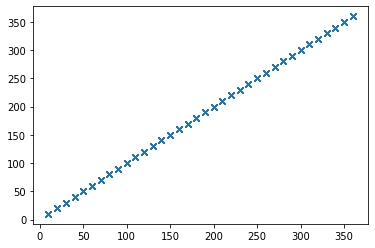

In [15]:
### CHECK!!!!!!!!!!!
[rho,phi] = cart2pol(df_BOM_oceano.Wind_u_ms.values, df_BOM_oceano.Wind_v_ms.values)
plt.plot(df_BOM.Wind_dir_deg_meteo.values[rho>0],fun_Dir_meteoFROMoceano_deg(rad2deg360(phi))[rho>0],'x')


# Daily averages

In [16]:
### Daily averages
# Average
# df_BOM_oceano_daily = df_BOM_oceano.groupby(df_BOM_oceano.index.date).mean().round(3)
# df_BOM_oceano_daily.index = pd.to_datetime(df_BOM_oceano_daily.index) #### CAREFUL!
df_BOM_oceano_daily = df_BOM_oceano.resample('1D').mean().round(3)

# But do not average direction in degrees!!!
# AND do not average precipitation since 9AM!
df_BOM_oceano_daily = df_BOM_oceano_daily.drop(columns=['Wind_dir_deg_meteo','Precip_since9AM_mm'])

# Check the new dates...
df_BOM.index.date
df_BOM_oceano_daily.index.date


array([datetime.date(1996, 2, 28), datetime.date(1996, 2, 29),
       datetime.date(1996, 3, 1), ..., datetime.date(2020, 3, 22),
       datetime.date(2020, 3, 23), datetime.date(2020, 3, 24)],
      dtype=object)

In [17]:
### Daily precipitations: get max (since each value is cummulated from 9am)
# df_temporary = df_BOM[['Precip_since9AM_mm']]
# df_temporary_max = df_BOM.groupby(df_BOM.index.date).max()
df_temporary_max = df_BOM.resample('1D').max()

# add to dataframe
df_BOM_oceano_daily['Precip_since9AM_mm_MAX'] = df_temporary_max.Precip_since9AM_mm 
df_BOM_oceano_daily

,Upwell_Index,Wind_speed_ms,Wind_v_ms,Wind_u_ms,Wind_tau_v,Wind_tau_u,Air_temp,Rel_hum_perc,MSLP_hPa,Wind_speed_kmh,Wind_gust_speed_kmh,Precip_since9AM_mm_MAX
1996-02-28,-0.254,5.126,2.806,0.446,0.024,-0.001,NaN,NaN,NaN,18.455,26.948,NaN
1996-02-29,-0.188,4.625,3.569,-2.876,0.027,-0.022,NaN,NaN,NaN,16.651,23.779,NaN
1996-03-01,-0.122,3.509,2.688,-2.256,0.018,-0.015,NaN,NaN,NaN,12.634,17.159,NaN
1996-03-02,0.302,5.270,-2.659,-2.015,-0.021,-0.015,NaN,NaN,NaN,18.973,25.193,NaN
1996-03-03,1.269,8.808,-8.756,-0.364,-0.115,-0.004,NaN,NaN,NaN,31.707,40.884,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,-0.286,5.101,1.780,2.857,0.017,0.021,25.652,NaN,NaN,18.365,25.187,NaN
2020-03-21,-0.062,3.817,0.829,-0.867,0.009,-0.008,21.296,NaN,NaN,13.742,17.517,NaN
2020-03-22,-0.728,7.188,5.670,-1.437,0.072,-0.011,21.752,NaN,NaN,25.879,34.077,NaN
2020-03-23,-0.217,4.544,2.449,-0.167,0.022,-0.004,19.073,NaN,NaN,16.358,21.438,NaN


# Plots

<Figure size 432x288 with 0 Axes>

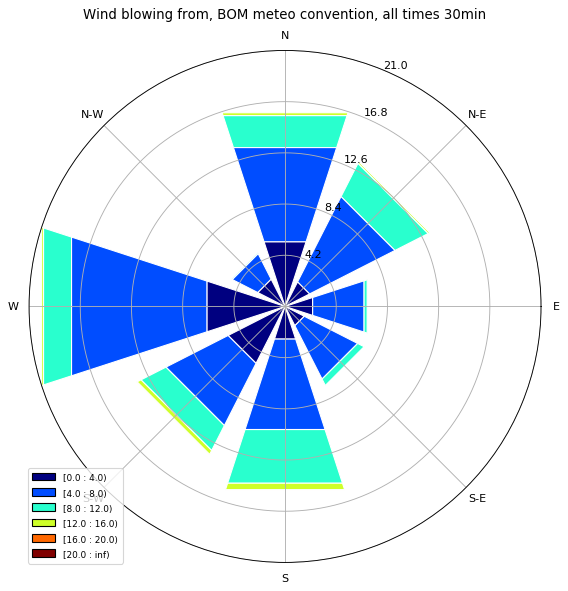

<Figure size 432x288 with 0 Axes>

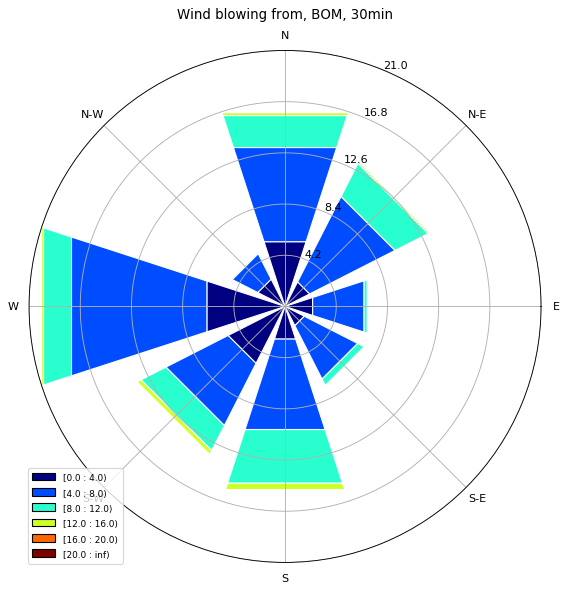

<Figure size 432x288 with 0 Axes>

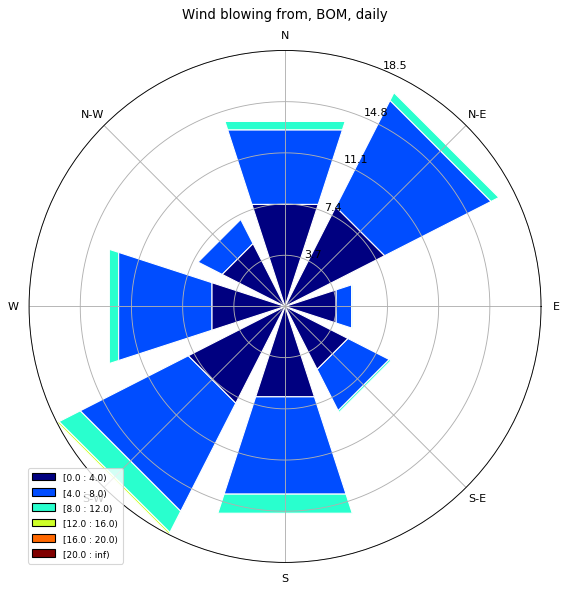

<Figure size 432x288 with 0 Axes>

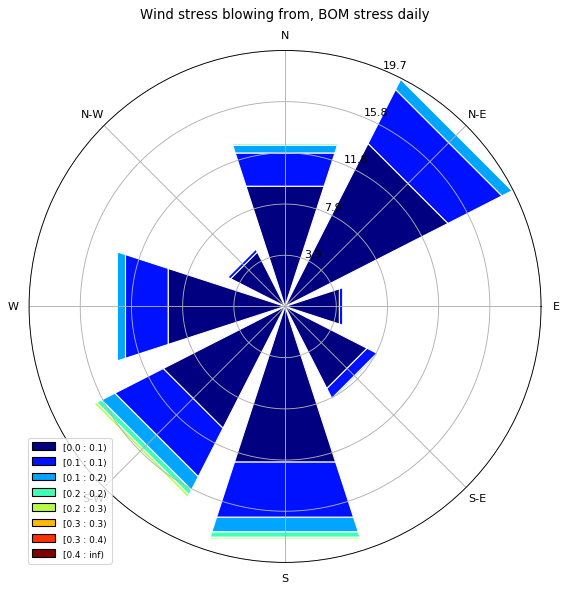

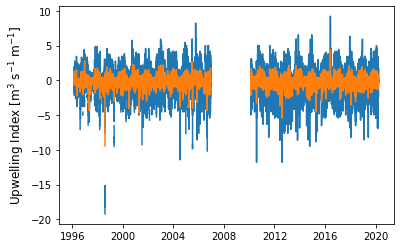

In [18]:
## Wind roses

# RAW data
fun_RosePlot(times_dates_UTC,df_BOM.Wind_dir_deg_meteo.values,df_BOM.Wind_speed_kmh.values/3.6,'BOM meteo convention, all times 30min')

# Raw in oceano convention
[rho,phi] = cart2pol(df_BOM_oceano.Wind_u_ms, df_BOM_oceano.Wind_v_ms)
fun_RosePlot(df_BOM_oceano.index,fun_Dir_meteoFROMoceano_deg(rad2deg360(phi)),rho,'BOM, 30min')
#plt.savefig(plot_folder + 'plot_windrose_period_30min_' + file_name + '.png', bbox_inches='tight', pad_inches=0.5, dpi=150)

# Daily averages in oceano convention
[rho,phi] = cart2pol(df_BOM_oceano_daily.Wind_u_ms, df_BOM_oceano_daily.Wind_v_ms)
fun_RosePlot(df_BOM_oceano_daily.index,fun_Dir_meteoFROMoceano_deg(rad2deg360(phi)),rho,'BOM, daily')
plt.savefig(plot_folder + 'plot_windrose_daily_' + file_name + '.png', bbox_inches='tight', pad_inches=0.5, dpi=150)

# Daily averages in oceano convention for wind stress
[rho,phi] = cart2pol(df_BOM_oceano_daily.Wind_tau_u, df_BOM_oceano_daily.Wind_tau_v)
fun_RosePlot_stress(df_BOM_oceano_daily.index,fun_Dir_meteoFROMoceano_deg(rad2deg360(phi)),rho,'BOM stress daily')
plt.savefig(plot_folder + 'plot_windrose_daily_stress_' + file_name + '.png', bbox_inches='tight', pad_inches=0.5, dpi=150)

# Upwelling index raw and daily
if ~np.isnan(lat):
    plt.figure()
    plt.plot(df_BOM_oceano.Upwell_Index)
    plt.plot(df_BOM_oceano_daily.Upwell_Index)
    plt.ylabel('Upwelling Index [m$^3$ s$^{-1}$ m$^{-1}$]', size=12)
    plt.savefig(plot_folder + 'plot_upwelling_index_daily_' + file_name + '.png', bbox_inches='tight', pad_inches=0.5, dpi=150)


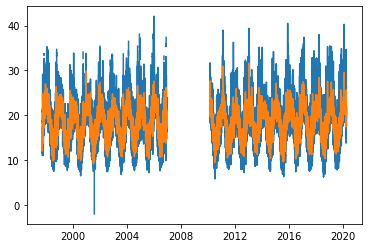

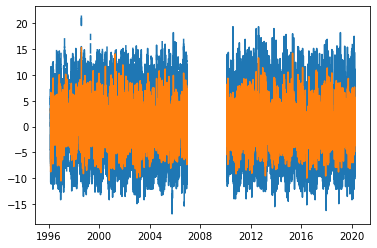

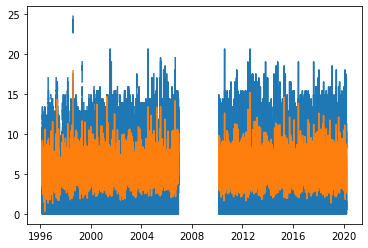

In [19]:
## Time series

# Plot compare daily and not
plt.figure()
plt.plot(df_BOM_oceano.index,df_BOM_oceano.Air_temp)
plt.plot(df_BOM_oceano_daily.index,df_BOM_oceano_daily.Air_temp)

plt.figure()
plt.plot(df_BOM_oceano.index,df_BOM_oceano.Wind_v_ms)
plt.plot(df_BOM_oceano_daily.index,df_BOM_oceano_daily.Wind_v_ms)

plt.figure()
plt.plot(df_BOM_oceano.index,df_BOM_oceano.Wind_speed_ms)
plt.plot(df_BOM_oceano_daily.index,df_BOM_oceano_daily.Wind_speed_ms)



## Stats (dataframe is amazing;))

In [20]:
df_BOM_oceano.describe() ######!!!
df_BOM_oceano_daily.describe() ######!!!


,Upwell_Index,Wind_speed_ms,Wind_v_ms,Wind_u_ms,Wind_tau_v,Wind_tau_u,Air_temp,Rel_hum_perc,MSLP_hPa,Wind_speed_kmh,Wind_gust_speed_kmh,Precip_since9AM_mm_MAX
count,7485.000000,7485.000000,7485.000000,7485.000000,7485.000000,7485.000000,7014.000000,0.0,0.0,7485.000000,7487.000000,10.0
mean,-0.081047,5.436612,0.321918,0.496135,0.005341,0.004556,18.318333,NaN,NaN,19.572425,25.663617,0.0
std,0.625295,1.858003,3.664937,3.022684,0.047961,0.034960,3.516867,NaN,NaN,6.688719,8.806538,0.0
min,-9.447000,0.250000,-10.535000,-10.425000,-0.280000,-0.253000,9.123000,NaN,NaN,0.900000,0.000000,0.0
25%,-0.357000,4.037000,-2.313000,-1.708000,-0.018000,-0.015000,15.413500,NaN,NaN,14.533000,19.001000,0.0
50%,-0.064000,5.216000,0.365000,0.119000,0.003000,0.000000,18.467000,NaN,NaN,18.779000,24.500000,0.0
75%,0.216000,6.597000,2.858000,2.377000,0.025000,0.018000,21.271000,NaN,NaN,23.749000,30.952500,0.0
max,4.317000,17.872000,15.299000,11.830000,0.686000,0.396000,31.640000,NaN,NaN,64.337000,85.475000,0.0


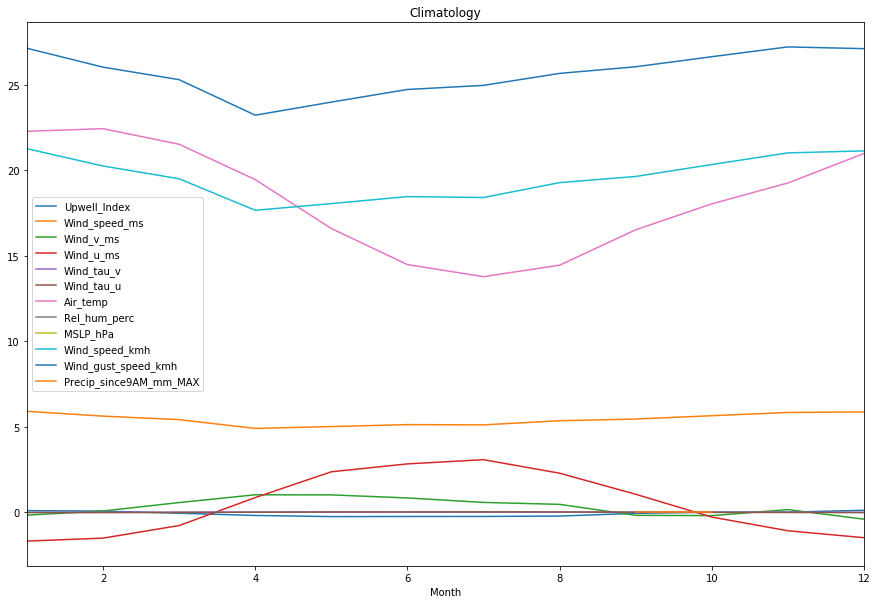

In [69]:
#PLOT climatology

clim = df_BOM_oceano_daily.groupby(df_BOM_oceano_daily.index.month).mean()
ax = clim.plot(figsize=(15,10),title='Climatology');
ax.set_xlabel("Month")
plt.savefig(plot_folder + 'plot_monthly_clim_' + file_name + '.png', bbox_inches='tight', pad_inches=0.5, dpi=150)


# SAVE

# Save to Netcdf and csv

In [21]:
# Save to Netcdf
xr_BOM_oceano_daily = df_BOM_oceano_daily.to_xarray()
xr_BOM_oceano_daily
xr_BOM_oceano_daily.rename({'index':'time'})
xr_BOM_oceano_daily.to_netcdf(file_name + "_oceano_daily.nc")

# Save to csv
df_BOM_oceano_daily
df_BOM_oceano_daily.to_csv(file_name + '_oceano_daily.csv',header='values')


In [22]:
# Save to Netcdf
xr_BOM_oceano = df_BOM_oceano.to_xarray()
xr_BOM_oceano
xr_BOM_oceano.rename({'index':'time'})
xr_BOM_oceano.to_netcdf(file_name + "_oceano.nc")

# Save to csv
df_BOM_oceano
df_BOM_oceano.to_csv(file_name + '_oceano.csv')


# Write README file to explain...

In [23]:
file = open('README_upwelling_index_oceano_daily.txt','w') 
 
file.write('Wind Upwelling Index\n') 
file.write('Calculated as offshore Ekman transport (positive means upwelling favourable)\n\n') 
file.write('Units: m$^3$ s$^{-1}$ m$^{-1}$ \n\n') 
file.write('From BOM wind station ' + str(file_name[0:17]) + '\n') 
file.write('http://www.bom.gov.au/climate/data/stations/ \n\n') 

file.write('NOTE: DATES in UTC (local -10h)! \n\n')


file.write('REF: https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2008JC004744 \n')
file.write('REF: https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2013JC009284 \n\n')
           
file.write('With: latitude,' + str(lat) + '\n') 
file.write('With: water density,' + str(rho_w) + ' m^3/kg \n') 
file.write('With: air density,' + str(rho_air) + ' m^3/kg \n') 
file.write('With: Cd from Wood et al: https://www.publish.csiro.au/mf/MF11250') 

file.close() 



# Now time for you to try!

<font size="4">
  
Pick your favourite station and create the daily NetCDF file.

Try with 3hourly data to get airtemp and precipitation...


## Lessons learnt:

* Dataframe is amazing for averaging
* ALWAYS check every step
* wind roses are great



## NEXT STEPS / Suggestions on how to improve the code?

* QC!!!!!!!!!!!!!!!!!!!!!
* Add Netcdf attributes
* check dates / times